**STEP-BY-STEP WEB SCRAPING WEBSITE NILAI TUKAR JPY TERHADAP IDR**

#### Mengambil konten website nilai tukar JPY terhadap IDR dari URL MonexNews
- Konten website yang diambil disimpan di `url_get`
- Informasi nilai tukar yang diambil adalah selama periode bulan Januari s.d. Desember 2019

In [1]:
import requests

url_get = requests.get("https://monexnews.com/kurs-valuta-asing.htm?kurs=JPY&searchdatefrom=01-01-2019&searchdateto=31-12-2019")

#### Melihat konten website yang diambil dari URL
- Konten website yang diambil dalam format HTML
- Menggunakan `.content` untuk melihat konten yang tersimpan di `url_get`
- Jumlah karakter yang ditampilkan dibatasi sebanyak 500 karakter

In [2]:
url_get.content[1:500]

b'!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml">\n<head>\n<meta http-equiv="Content-Language" content="en,in" />\n<link rel="alternate" href="https://news.mifx.com/kurs-valuta-asing.php" hreflang="en-ID" />\n<base href="https://news.mifx.com/" target="_self" />\n<title>Kurs Dollar | USD | Nilai Tukar Dollar Hari Ini</title>\n<meta property="og:title" content="Kurs Dollar | USD | Nilai T'

#### Menggunakan package BeautifulSoup untuk membuat class BeautifulSoup yang kemudian menghasilkan sebuah object BeautifulSoup
- `BeautifulSoup` dapat mengubah format dokumen HTML yang kompleks menjadi susunan object Python yang terstruktur dan mudah dibaca

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


#### Memanfaatkan method di BeautifulSoup untuk merapikan format konten HTML yang telah diambil dari URL
- `.prettify` merupakan method di `BeatifulSoup` yang dapat menjadikan konten HTML lebih rapi, terstruktur, dan mudah dibaca sebagaimana terlampir di bawah

In [4]:
print(soup.prettify()[:1000])

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <meta content="en,in" http-equiv="Content-Language"/>
  <link href="https://news.mifx.com/kurs-valuta-asing.php" hreflang="en-ID" rel="alternate"/>
  <base href="https://news.mifx.com/" target="_self"/>
  <title>
   Kurs Dollar | USD | Nilai Tukar Dollar Hari Ini
  </title>
  <meta content="Kurs Dollar | USD | Nilai Tukar Dollar Hari Ini" property="og:title"/>
  <meta content="Nilai tukar rupiah terhadap dollar hari ini berdasarkan kurs tengah Bank Indonesia. " name="description"/>
  <meta content="Nilai tukar rupiah terhadap dollar hari ini berdasarkan kurs tengah Bank Indonesia. " property="og:description"/>
  <meta content="Broker Terbaik, Trading Forex, Trading Teregulasi, Trading Online, Monex, mifx," name="keywords"/>
  <meta content="favicon.jpg?v=1570462055" property="og:image"/>
  <meta content="Ultimaen

#### Mengidentifikasi elemen HTML yang perlu diambil untuk proses scraping
- Dalam hal ini elemen yang perlu diambil adalah tabel nilai tukar
- Tabel nilai tukar di HTML merupakan sebuah `class` dengan nama `table`

In [5]:
table = soup.find('table', attrs={'class':'centerText newsTable2'})
print(table.prettify()[1:500])

table cellpadding="10" cellspacing="0" class="centerText newsTable2" width="100%">
 <tr class="colorWhite fontsize14 firstRow">
  <td>
   TANGGAL
  </td>
  <td>
   ASK
  </td>
  <td>
   BID
  </td>
 </tr>
 <tr class="verySoftGreyBg">
  <td>
   31 Desember 2019
  </td>
  <td>
   128,62
  </td>
  <td>
   127,32
  </td>
 </tr>
 <tr>
  <td>
   30 Desember 2019
  </td>
  <td>
   128,30
  </td>
  <td>
   127,02
  </td>
 </tr>
 <tr class="verySoftGreyBg">
  <td>
   27 Desember 2019
  </td>
  <td>
   1


#### Mengidentifikasi informasi yang dibutuhkan dari tabel untuk proses scraping
- Informasi yang dibutuhkan ada di elemen `tr` (table row)
- Menggunakan `.find_all` untuk mencari semua elemen `tr` pada tabel

In [6]:
tr = table.find_all('tr')
tr[:2] # just call 2 founded tr

[<tr class="colorWhite fontsize14 firstRow">
 <td>TANGGAL</td>
 <td>ASK</td>
 <td>BID</td>
 </tr>,
 <tr class="verySoftGreyBg">
 <td>31 Desember 2019</td>
 <td>128,62</td>
 <td>127,32</td>
 </tr>]

#### Proses scraping dengan cara looping setiap baris (`tr`) untuk mengambil informasi `tanggal`, `kurs_jual` (ask), dan `kurs_beli` (bid)
- Hasil scraping disimpan dalam bentuk tuple
- Urutan baris informasi sesuai dengan dengan konten website (dimulai dari bulan Desember)

In [7]:
temp = [] #initiating a tuple

for i in range(1, len(tr)):
    row = table.find_all('tr')[i]
    
    #get tanggal
    tanggal = row.find_all('td')[0].text
    tanggal = tanggal.strip() #remove excess whitespace
    tanggal = tanggal.replace(u'\xa0', u' ')
    
    #get kurs jual (ask)
    kurs_jual = row.find_all('td')[1].text
    kurs_jual = kurs_jual.strip() #remove excess whitespace
    
    #get kurs beli (bid)
    kurs_beli = row.find_all('td')[2].text
    kurs_beli = kurs_beli.strip() #remove excess whitespace
    
    temp.append((tanggal, kurs_jual, kurs_beli)) 
    
temp 

[('31 Desember 2019', '128,62', '127,32'),
 ('30 Desember 2019', '128,30', '127,02'),
 ('27 Desember 2019', '128,11', '126,83'),
 ('26 Desember 2019', '128,27', '126,98'),
 ('23 Desember 2019', '128,39', '127,10'),
 ('20 Desember 2019', '128,63', '127,34'),
 ('19 Desember 2019', '128,24', '126,93'),
 ('18 Desember 2019', '128,64', '127,32'),
 ('17 Desember 2019', '128,62', '127,33'),
 ('16 Desember 2019', '128,67', '127,36'),
 ('13 Desember 2019', '128,30', '127,02'),
 ('12 Desember 2019', '130,04', '128,71'),
 ('11 Desember 2019', '129,65', '128,34'),
 ('10 Desember 2019', '129,56', '128,26'),
 ('09 Desember 2019', '129,76', '128,44'),
 ('06 Desember 2019', '129,78', '128,45'),
 ('05 Desember 2019', '130,10', '128,77'),
 ('04 Desember 2019', '130,79', '129,45'),
 ('03 Desember 2019', '130,15', '128,82'),
 ('02 Desember 2019', '129,36', '128,04'),
 ('29 November 2019', '129,44', '128,12'),
 ('28 November 2019', '129,47', '128,15'),
 ('27 November 2019', '129,84', '128,53'),
 ('26 Novem

#### Membalik urutan baris informasi dalam tuple agar dimulai dari bulan Januari
- Tujuannya agar dapat menghasilkan grafik yang informatif
- Format grafik tahunan pada umumnya dimulai dari bulan Januari

In [8]:
temp = temp[::-1]
temp

[('02 Januari 2019', '132,89', '131,54'),
 ('03 Januari 2019', '135,44', '134,08'),
 ('04 Januari 2019', '133,51', '132,17'),
 ('07 Januari 2019', '130,86', '129,51'),
 ('08 Januari 2019', '129,84', '128,52'),
 ('09 Januari 2019', '130,31', '129,00'),
 ('10 Januari 2019', '131,22', '129,88'),
 ('11 Januari 2019', '130,62', '129,31'),
 ('14 Januari 2019', '130,52', '129,19'),
 ('15 Januari 2019', '130,56', '129,23'),
 ('16 Januari 2019', '131,11', '129,75'),
 ('17 Januari 2019', '130,61', '129,27'),
 ('18 Januari 2019', '130,37', '129,03'),
 ('21 Januari 2019', '130,31', '128,98'),
 ('22 Januari 2019', '130,39', '129,07'),
 ('23 Januari 2019', '130,05', '128,75'),
 ('24 Januari 2019', '129,79', '128,48'),
 ('25 Januari 2019', '129,68', '128,37'),
 ('28 Januari 2019', '128,97', '127,65'),
 ('29 Januari 2019', '129,74', '128,43'),
 ('30 Januari 2019', '129,79', '128,47'),
 ('31 Januari 2019', '129,92', '128,60'),
 ('01 Februari 2019', '129,05', '127,75'),
 ('04 Februari 2019', '128,24', '

#### Menyimpan hasil scraping dalam bentuk `DataFrame` `Pandas`

In [9]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('tanggal', 'kurs_jual', 'kurs_beli'))
df.head()

,tanggal,kurs_jual,kurs_beli
0,02 Januari 2019,"132,89","131,54"
1,03 Januari 2019,"135,44","134,08"
2,04 Januari 2019,"133,51","132,17"
3,07 Januari 2019,"130,86","129,51"
4,08 Januari 2019,"129,84","128,52"


#### Mengganti tanda koma pada nilai-nilai di kolom `kurs_jual` dan `kurs_beli` menjadi titik agar dapat diolah dalam bentuk `float64`

In [10]:
df['kurs_jual'] = df['kurs_jual'].str.replace(",",".")
df['kurs_beli'] = df['kurs_beli'].str.replace(",",".")

df.head()

,tanggal,kurs_jual,kurs_beli
0,02 Januari 2019,132.89,131.54
1,03 Januari 2019,135.44,134.08
2,04 Januari 2019,133.51,132.17
3,07 Januari 2019,130.86,129.51
4,08 Januari 2019,129.84,128.52


#### Mengubah format tanggal
- Semula dalam format bahasa Indonesia
- Menjadi format bahasa Inggris

In [11]:
import dateparser

df['tanggal'] = df['tanggal'].apply(lambda x: dateparser.parse(x))

In [12]:
df.head()

,tanggal,kurs_jual,kurs_beli
0,2019-01-02,132.89,131.54
1,2019-01-03,135.44,134.08
2,2019-01-04,133.51,132.17
3,2019-01-07,130.86,129.51
4,2019-01-08,129.84,128.52


#### Mengubah tipe data `kurs_jual` dan `kurs_beli`
- Semula tipe data `string`
- Menjadi tipe data `float64`

In [13]:
df[['kurs_jual', 'kurs_beli']] = df[['kurs_jual', 'kurs_beli']].astype('float64')

df.dtypes

tanggal      datetime64[ns]
kurs_jual           float64
kurs_beli           float64
dtype: object

#### Membuat kolom baru `periode` (bulan)
- Menggunakan `.dt.to_period('M')` untuk mendapatkan periode bulan dari kolom `tanggal`
- Tujuannya untuk mendapatkan analisis data yang lebih informatif

In [14]:
df['periode'] = df['tanggal'].dt.to_period('M')
df.head()

,tanggal,kurs_jual,kurs_beli,periode
0,2019-01-02,132.89,131.54,2019-01
1,2019-01-03,135.44,134.08,2019-01
2,2019-01-04,133.51,132.17,2019-01
3,2019-01-07,130.86,129.51,2019-01
4,2019-01-08,129.84,128.52,2019-01


#### Menjadikan kolom `tanggal` sebagai index
- Untuk menghasilkan grafik nilai tukar JPY (y-axis) berdasarkan `tanggal` (x-axis)

In [15]:
kurs_tanggal = df.set_index("tanggal")

In [16]:
kurs_tanggal.head()

,kurs_jual,kurs_beli,periode
tanggal,,,
2019-01-02,132.89,131.54,2019-01
2019-01-03,135.44,134.08,2019-01
2019-01-04,133.51,132.17,2019-01
2019-01-07,130.86,129.51,2019-01
2019-01-08,129.84,128.52,2019-01


#### Membuat grafik nilai tukar JPY (y-axis) berdasarkan `tanggal` (x-axis)
- Menggunakan `.plot()` untuk membuat grafik garis

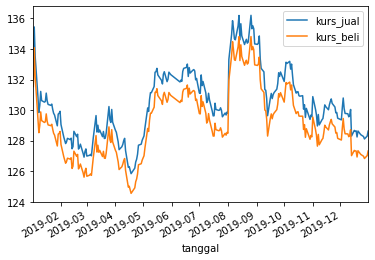

In [17]:
kurs_tanggal.plot()

#### Menyiapkan sebuah `DataFrame` untuk merepresentasikan nilai tukar JPY berdasarkan `periode` bulan
- Tujuannya agar grafik lebih mudah dibaca dan menghasilkan analisis yang lebih berarti
- Menggunakan `.groupby` untuk mengelompokkan nilai kurs JPY berdasarkan `periode` bulan
- Hasil pengelompokan nilai kurs JPY mengambil nilai rata-rata untuk merepresentasikan nilai tukar JPY pada `periode` bulan tertentu

In [18]:
kurs_periode = df.groupby('periode').mean().round(2)

In [19]:
kurs_periode.head()

,kurs_jual,kurs_beli
periode,,
2019-01,130.75,129.42
2019-02,127.86,126.57
2019-03,128.52,127.22
2019-04,127.37,126.07
2019-05,131.47,130.14


#### Membuat grafik nilai tukar Yen (y-axis) berdasarkan `periode`/bulan (x-axis)
- Menggunakan `.plot()` untuk membuat grafik garis

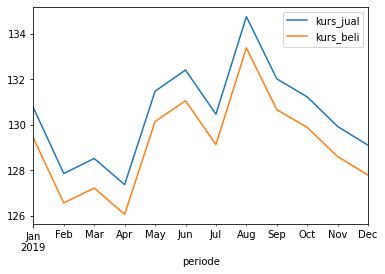

In [20]:
kurs_periode.plot()

#### Analisis Data
- Nilai tukar JPY mengalami tren menurun pada kuartal pertama 2019
- Nilai tukar JPY mengalami tren pergerakan naik pada kuartal kedua dan ketiga 2019
    - ada pergerakan turun sesaat dari bulan Juni sampai dengan Juli
- Mulai pertengahan kuartal ketiga pergerakan nilai tukar JPY terus mengalami penurunan hingga akhir tahun 2019
- Rata-rata nilai tukar terendah JPY di tahun 2019 terjadi pada bulan April
- Rata-rata nilai tukar JPY tertinggi di tahun 2019 terjadi pada bulan Agustus
    - Sebuah fakta menarik bahwa bulan Agustus merupakan periode Obon (お盆) atau Bon (盆), di mana terdapat serangkaian upacara dan tradisi di Jepang untuk merayakan kedatangan arwah leluhur
    - Bulan Agustus merupakan periode yang ramai dengan perayaan dan festival, serta termasuk periode paling mahal untuk traveling ke Jepang
    - Source:
        - https://www.japan.travel/en/guide/august/
        - https://jw-webmagazine.com/top-10-things-to-do-in-japan-in-august-2c41ca622591/
